In [1]:
#%matplotlib notebook
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count


HE = -20/57.3 # heading error in radians
N = 3 #proportional navigation gain 
samples = 1001
t = np.linspace(0, 10, samples) 
v_p0 = 3000   #ft/s
V_T= 1000    #ft/s
R_0 = 30000   #ft
dt = 0.01      #sec

v_pz_intertial_0= v_p0*np.sin(HE)

v_px_intertial_0= v_p0*np.cos(HE)

print(t.size)

R_px = np.zeros(t.size)
R_pz = np.zeros(t.size)

R_px_true = np.zeros(t.size)
R_pz_true = np.zeros(t.size)

R_tx = np.zeros(t.size)
L = np.zeros(t.size)
R_tz = np.zeros(t.size)

R_tpx= np.zeros(t.size)
R_tpz= np.zeros(t.size)

R_tpx_true= np.zeros(t.size)
R_tpz_true= np.zeros(t.size)

lamda = np.zeros(t.size)

a_p_pure = np.zeros(t.size)

a_i_pure_x =np.zeros(t.size) 
a_i_pure_z = np.zeros(t.size)

a_p_true = np.zeros(t.size)

a_i_true_x =np.zeros(t.size) 
a_i_true_z = np.zeros(t.size)
range_pt  = np.zeros(t.size)

V_px = np.zeros(t.size)
V_pz =np.zeros(t.size)

V_px_true = np.zeros(t.size)
V_pz_true =np.zeros(t.size)

V_tx = -V_T*np.ones(t.size)

V_tz = np.zeros(t.size)



print(R_px)

V_px[0]= v_px_intertial_0

i=0

R_tx[0] = 30000
R_tpx[0] = 30000
V_pz[0]= v_pz_intertial_0

flag1= True
flag2= True


# Pure ProNav 
while (flag1 and flag2):
    R_px[i+1]= V_px[i]*dt + R_px[i]
    R_pz[i+1]= V_pz[i]*dt + R_pz[i]

    R_px_true[i+1]= V_px[i]*dt + R_px_true[i]
    R_pz_true[i+1]= V_pz[i]*dt + R_pz_true[i]
    
    R_tx[i+1]= V_tx[i]*dt + R_tx[i]
    
    R_tpx[i+1] = R_px[i+1] - R_tx[i+1]
    R_tpz[i+1] = R_pz[i+1] - R_tz[i+1]

    lamda[i+1] = np.arctan(R_tpz[i+1]/R_tpx[i+1])
    L[i+1]  =  np.arcsin((V_T/v_p0*np.sin(lamda[i+1])))
    lamda_dot = (lamda[i+1]-lamda[i])/dt 
    a_p_pure[i+1] = N*np.sqrt(np.power(V_px[i],2) + np.power(V_pz[i],2))*lamda_dot

    a_i_pure_x[i+1]= a_p_pure[i+1]*np.sin(lamda[i+1])
    a_i_pure_z[i+1]= a_p_pure[i+1]*np.cos(lamda[i+1])

    # V_px[i+1] = v_p0*np.cos(L[i+1] + HE + lamda[i+1])
    # V_pz[i+1] = v_p0*np.sin(L[i+1] + HE + lamda[i+1])
    
    V_px[i+1] = a_i_pure_x[i+1]*dt + V_px[i]
    V_pz[i+1] = a_i_pure_z[i+1]*dt + V_pz[i]

    range_pt[i] = np.sqrt(np.power(R_tpx[i],2) + np.power(R_tpz[i],2))
    
    if ((R_px[i] > 0.99*R_tx[i]) and (R_px[i] < 1.01*R_tx[i])): # crudely tracing the hit 
     flag1 = False
    else:
     flag1 = True

    if ((R_pz[i] > 0.99*R_tz[i]) and (R_pz[i] < 1.01*R_tz[i])):
     flag2 = False
    else:
     flag2 = True

    i += 1
    
    

1001
[0. 0. 0. ... 0. 0. 0.]


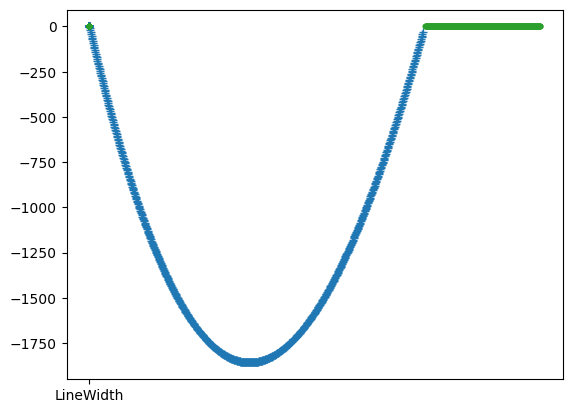

In [46]:
# unsuccessful attempt of making a live graph 
#x1_vals = []
#y1_vals = []
#x2_vals = []
#y2_vals = []
#i= count()
#def animate(i):
#    x1_vals.append(R_px[i])
#    y1_vals.append(R_pz[i])
#    x2_vals.append(R_tx[i])
#    y2_vals.append(R_tz[i])
    
#    plt.plot(x1_vals,y1_vals,'*')
#    plt.plot(x2_vals,y2_vals,'.')


#ani = FuncAnimation(plt.gcf(), animate, interval=1000)
#plt.tight_layout()
plt.plot(R_px,R_pz,'+','LineWidth',0.01)
plt.plot(R_tx,R_tz,'.')
plt.show() 


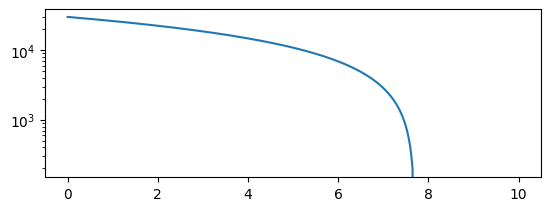

In [41]:
#plt.plot(t,range_pt,'.')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(t,range_pt)
ax.set_yscale('log')
pylab.show()


In [ ]:
R_tpx

In [ ]:
print(N)

In [ ]:
print(R_pz)

In [ ]:
print(v_pz_intertial_0)

In [ ]:
print(V_px)

In [ ]:
print(i)
